#Importing Library

**Importing the library that is needed in this project.**
- Pandas : manipulate and analyze data
- Matplotlib & Seaborn : data visualization
- Numpy (arrange) : build an array with a specified number
- Sklearn : for splitting & training the data with logistic regression algorithm, making label encoder & confussion matrix, also measuring the accuracy, prediction, & recall score

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score

#Understanding Dataset

**Read and understand Retail Dataset with knowing features and information about data.**
<br>
This dataset has 8 features and 100.000 rows with variate data types such as int and object. All of the columns are filled by value.

In [7]:
df = pd.read_csv("https://storage.googleapis.com/dqlab-dataset/data_retail.csv", delimiter=';')

df

,no,Row_Num,Customer_ID,Product,First_Transaction,Last_Transaction,Average_Transaction_Amount,Count_Transaction
0,1,1,29531,Jaket,1466304274396,1538718482608,1467681,22
1,2,2,29531,Sepatu,1406077331494,1545735761270,1269337,41
2,3,3,141526,Tas,1493349147000,1548322802000,310915,30
3,4,4,141526,Jaket,1493362372547,1547643603911,722632,27
4,5,5,37545,Sepatu,1429178498531,1542891221530,1775036,25
...,...,...,...,...,...,...,...,...
99995,99996,99996,56249,Jaket,1464780939092,1464780939092,298662,1
99996,99997,99997,56249,Sepatu,1486619170763,1486619170763,349556,1
99997,99998,99998,34157,Jaket,1440924860706,1440924860706,598013,1
99998,99999,99999,34157,Sepatu,1415932948026,1415932948026,1208591,1


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 8 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   no                          100000 non-null  int64 
 1   Row_Num                     100000 non-null  int64 
 2   Customer_ID                 100000 non-null  int64 
 3   Product                     100000 non-null  object
 4   First_Transaction           100000 non-null  int64 
 5   Last_Transaction            100000 non-null  int64 
 6   Average_Transaction_Amount  100000 non-null  int64 
 7   Count_Transaction           100000 non-null  int64 
dtypes: int64(7), object(1)
memory usage: 6.1+ MB


#Data Cleaning and Preparation

Convert the **"First_Transaction"** and **"Last_Transaction"** values to DateTime by dividing it by 1000 because the value is in milliseconds and setting the parameter "unit" as a second.


In [9]:
df['First_Transaction'] = pd.to_datetime(df['First_Transaction']/1000, unit='s', origin='1970-01-01')
df['Last_Transaction'] = pd.to_datetime(df['Last_Transaction']/1000, unit='s', origin='1970-01-01')

Check the last transaction from this dataset for identifying whether the customer still includes regular customers (churn) or not because **the customer has never done a transaction again for 6 months based on this dataset's last transaction not categorized as a customer anymore**.

In [10]:
print(max(df['Last_Transaction']))

2019-02-01 23:57:57.286000128


Build a new column for categorizing whether the customer is churning or not based on **6 months before the last transaction date** in this dataset which is **'2019-02-01'**. So, the date used for categorizing the customer is **'2018-08-01'**.


In [11]:
df.loc[df['Last_Transaction'] <= '2018-08-01', 'is_churn'] = True
df.loc[df['Last_Transaction'] > '2018-08-01', 'is_churn'] = False

Drop unnecessary columns.

In [12]:
df = df.drop(['no'], axis=1)
df = df.drop(['Row_Num'], axis=1)

df.head()

,Customer_ID,Product,First_Transaction,Last_Transaction,Average_Transaction_Amount,Count_Transaction,is_churn
0,29531,Jaket,2016-06-19 02:44:34.396000000,2018-10-05 05:48:02.608000000,1467681,22,False
1,29531,Sepatu,2014-07-23 01:02:11.493999872,2018-12-25 11:02:41.269999872,1269337,41,False
2,141526,Tas,2017-04-28 03:12:27.000000000,2019-01-24 09:40:02.000000000,310915,30,False
3,141526,Jaket,2017-04-28 06:52:52.546999808,2019-01-16 13:00:03.911000064,722632,27,False
4,37545,Sepatu,2015-04-16 10:01:38.530999808,2018-11-22 12:53:41.529999872,1775036,25,False


Build new columns and convert the DateTime format in the **"First_Transaction"** and **"Last_Transaction"** columns to year.

In [13]:
# Kolom tahun transaksi pertama
df['Year_First_Transaction'] = df['First_Transaction'].dt.year
# Kolom tahun transaksi terakhir
df['Year_Last_Transaction'] = df['Last_Transaction'].dt.year

#Data Analysis and Visualization

Visualize the **Customer Acquisition Graph** by grouping the dataset with 'Year_First_Transaction' columns which will return the year and count the number of customers per year.
The visualization uses a bar chart, the x-axis is years and the y-axis is the number of customers.

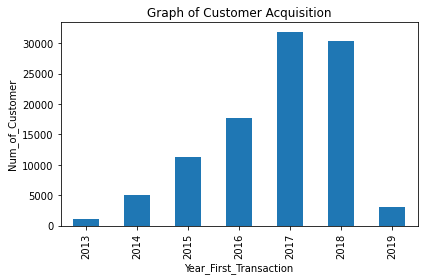

In [14]:
df_year = df.groupby(['Year_First_Transaction'])['Customer_ID'].count()
df_year.plot(x='Year_First_Transaction', y='Customer_ID', kind='bar', title='Graph of Customer Acquisition')
plt.xlabel('Year_First_Transaction')
plt.ylabel('Num_of_Customer')
plt.tight_layout()
plt.show()

Visualize the **Customer Transaction Graph** by grouping the dataset with 'Year_First_Transaction' columns which will return the year and sum all transactions made by customers per year.
The visualization uses a bar chart, the x-axis is years and the y-axis is the number of transactions made by customers.

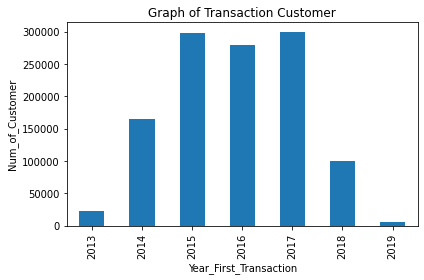

In [15]:
df_year = df.groupby(['Year_First_Transaction'])['Count_Transaction'].sum()
df_year.plot(x='Year_First_Transaction', y='Count_Transaction', kind='bar', title='Graph of Transaction Customer')
plt.xlabel('Year_First_Transaction')
plt.ylabel('Num_of_Customer')
plt.tight_layout()
plt.show()

Visualize the **Average Transaction Amount Graph** by grouping the dataset with the 'Year_First_Transaction' & 'Product' columns and calculate the average transaction for every product.
The visualization uses a line chart, the x-axis is years and the y-axis is the average transaction.

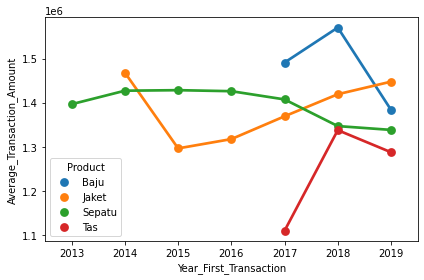

In [16]:
plt.clf()
sns.pointplot(data = df.groupby(['Product', 'Year_First_Transaction']).mean().reset_index(), 
              x='Year_First_Transaction', 
              y='Average_Transaction_Amount', 
              hue='Product')
plt.tight_layout()
plt.show()

Visualize the **Proportion Churn by Product Graph** by making the pivot table with 'Product' as columns, 'is_churn' as the index, and 'Customer_ID' as values.
The visualization uses a pie chart to find out the proportion of churn per product.

Product   Baju  Jaket  Sepatu   Tas
is_churn                           
False     1268  11123   16064  4976
True      2144  23827   33090  7508


<Figure size 432x288 with 0 Axes>

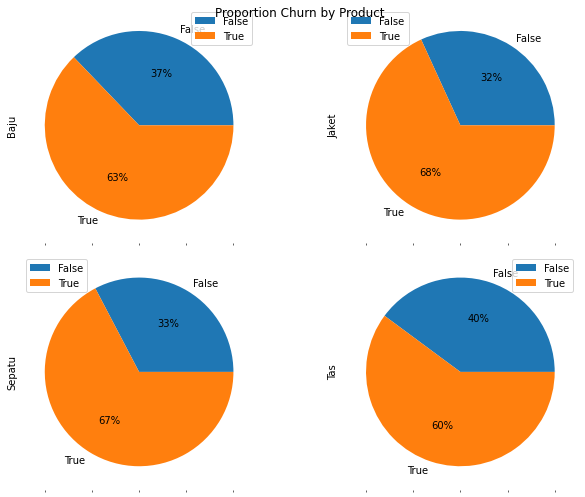

In [17]:
plt.clf()
# Melakukan pivot data dengan pivot_table
df_piv = df.pivot_table(index='is_churn', 
                        columns='Product',
                        values='Customer_ID', 
                        aggfunc='count', 
                        fill_value=0)
print(df_piv)
# Mendapatkan Proportion Churn by Product
plot_product = df_piv.count().sort_values(ascending=False).head(5).index
# Plot pie chartnya
df_piv = df_piv.reindex(columns=plot_product)
df_piv.plot.pie(subplots=True,
                figsize=(10, 7),
                layout=(-1, 2),
                autopct='%1.0f%%',
                title='Proportion Churn by Product')
plt.tight_layout()
plt.show()

Visualize the **Customer Distribution by Count Transaction Group Graph** by making a new column named 'Count_Transaction_Group' which contain a value which categorizes the number of transactions and group the dataset by this column which will return the number of customers.
The visualization uses a bar chart, the x-axis is 'Count_Transaction_Group' and the y-axis is the number of customers.

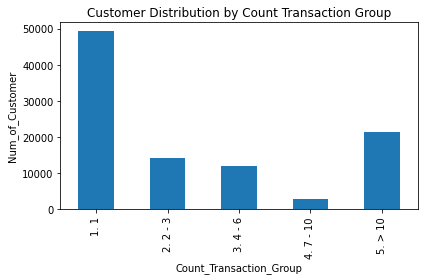

In [18]:
plt.clf()
# Kategorisasi jumlah transaksi
def func(row):
    if row['Count_Transaction'] == 1:
        val = '1. 1'
    elif (row['Count_Transaction'] > 1 and row['Count_Transaction'] <= 3):
        val ='2. 2 - 3'
    elif (row['Count_Transaction'] > 3 and row['Count_Transaction'] <= 6):
        val ='3. 4 - 6'
    elif (row['Count_Transaction'] > 6 and row['Count_Transaction'] <= 10):
        val ='4. 7 - 10'
    else:
        val ='5. > 10'
    return val
# Tambahkan kolom baru
df['Count_Transaction_Group'] = df.apply(func, axis=1)

df_year = df.groupby(['Count_Transaction_Group'])['Customer_ID'].count()
df_year.plot(x='Count_Transaction_Group', y='Customer_ID', kind='bar', title='Customer Distribution by Count Transaction Group')
plt.xlabel('Count_Transaction_Group')
plt.ylabel('Num_of_Customer')
plt.tight_layout()
plt.show()

Visualize the **Distribution of the Average Transaction Amount Categorization Graph** by making a new column named 'Average_Transaction_Amount_Group' which contain a value that categorizes the average of transactions and group the dataset by this column which will return the number of customers.
The visualization uses a bar chart, the x-axis is 'Average_Transaction_Amount_Group' and the y-axis is the number of customers.

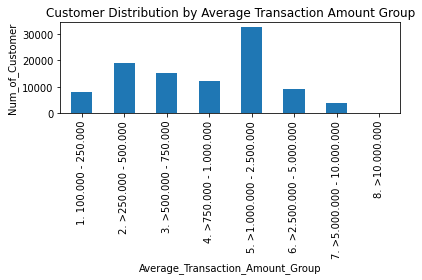

In [19]:
plt.clf()
# Kategorisasi rata-rata besar transaksi
def f(row):
    if (row['Average_Transaction_Amount'] >= 100000 and row['Average_Transaction_Amount'] <= 250000):
        val ='1. 100.000 - 250.000'
    elif (row['Average_Transaction_Amount'] > 250000 and row['Average_Transaction_Amount'] <= 500000):
        val ='2. >250.000 - 500.000'
    elif (row['Average_Transaction_Amount'] > 500000 and row['Average_Transaction_Amount'] <= 750000):
        val ='3. >500.000 - 750.000'
    elif (row['Average_Transaction_Amount'] > 750000 and row['Average_Transaction_Amount'] <= 1000000):
        val ='4. >750.000 - 1.000.000'
    elif (row['Average_Transaction_Amount'] > 1000000 and row['Average_Transaction_Amount'] <= 2500000):
        val ='5. >1.000.000 - 2.500.000'
    elif (row['Average_Transaction_Amount'] > 2500000 and row['Average_Transaction_Amount'] <= 5000000):
        val ='6. >2.500.000 - 5.000.000'
    elif (row['Average_Transaction_Amount'] > 5000000 and row['Average_Transaction_Amount'] <= 10000000):
        val ='7. >5.000.000 - 10.000.000'
    else:
        val ='8. >10.000.000'
    return val
# Tambahkan kolom baru
df['Average_Transaction_Amount_Group'] = df.apply(f, axis=1)

df_year = df.groupby(['Average_Transaction_Amount_Group'])['Customer_ID'].count()
df_year.plot(x='Average_Transaction_Amount_Group', y='Customer_ID', kind='bar', title='Customer Distribution by Average Transaction Amount Group')
plt.xlabel('Average_Transaction_Amount_Group')
plt.ylabel('Num_of_Customer')
plt.tight_layout()
plt.show()

# Data Modelling

Make a new column that contains the difference between the last and first transaction year named 'Year_Diff'. 

Choose the 'Average_Transaction_Amount', 'Count_Transaction', and 'Year_Diff' columns to be training data and the 'is_churn' column to be testing data.

In [ ]:
# Feature column: Year_Diff
df['Year_Diff'] = df['Year_Last_Transaction'] - df['Year_First_Transaction']

# Nama-nama feature columns
feature_columns = ['Average_Transaction_Amount', 'Count_Transaction', 'Year_Diff']

# Features variable
X = df[feature_columns] 

# Target variable
y = df['is_churn']

Encode the' is_churn' column to be numerical data because this column is still categorical data.

In [ ]:
# Create an instance of the LabelEncoder class
le = LabelEncoder()

# Fit the encoder to the categorical data
le.fit(y)

# Transform the categorical data to numerical data
y_new = le.transform(y)

Split the training and testing data to be **75% and 25%** respectively by using the 'train_test_split' function from the sklearn library.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y_new, test_size=0.25, random_state=0)

Train the x feature with a logistic regression algorithm and predict it with the y feature.

In [ ]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

Visualize the confusion matrix with the 'confusion_matrix' function using testing data.

<Figure size 432x288 with 0 Axes>

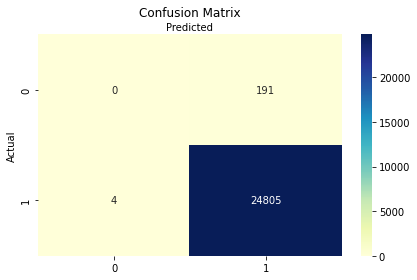

In [ ]:
cnf_matrix = confusion_matrix(y_test, y_pred)
plt.clf()
# name  of classes
class_names = [0, 1] 
fig, ax = plt.subplots()

tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap='YlGnBu', fmt='g')
ax.xaxis.set_label_position('top')
plt.title('Confusion Matrix', y=1.1)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.tight_layout()
plt.show()

Measure the accuracy, precision, and recall score using the testing data.

In [ ]:
#Menghitung Accuracy, Precision, dan Recall
print('Accuracy :', accuracy_score(y_test, y_pred))
print('Precision:', precision_score(y_test, y_pred, average='micro'))
print('Recall   :', recall_score(y_test, y_pred, average='micro'))

Accuracy : 0.9922
Precision: 0.9922
Recall   : 0.9922
